In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
data = pd.read_excel("data.xlsx")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
data.shape

(303, 14)

Data Distribution


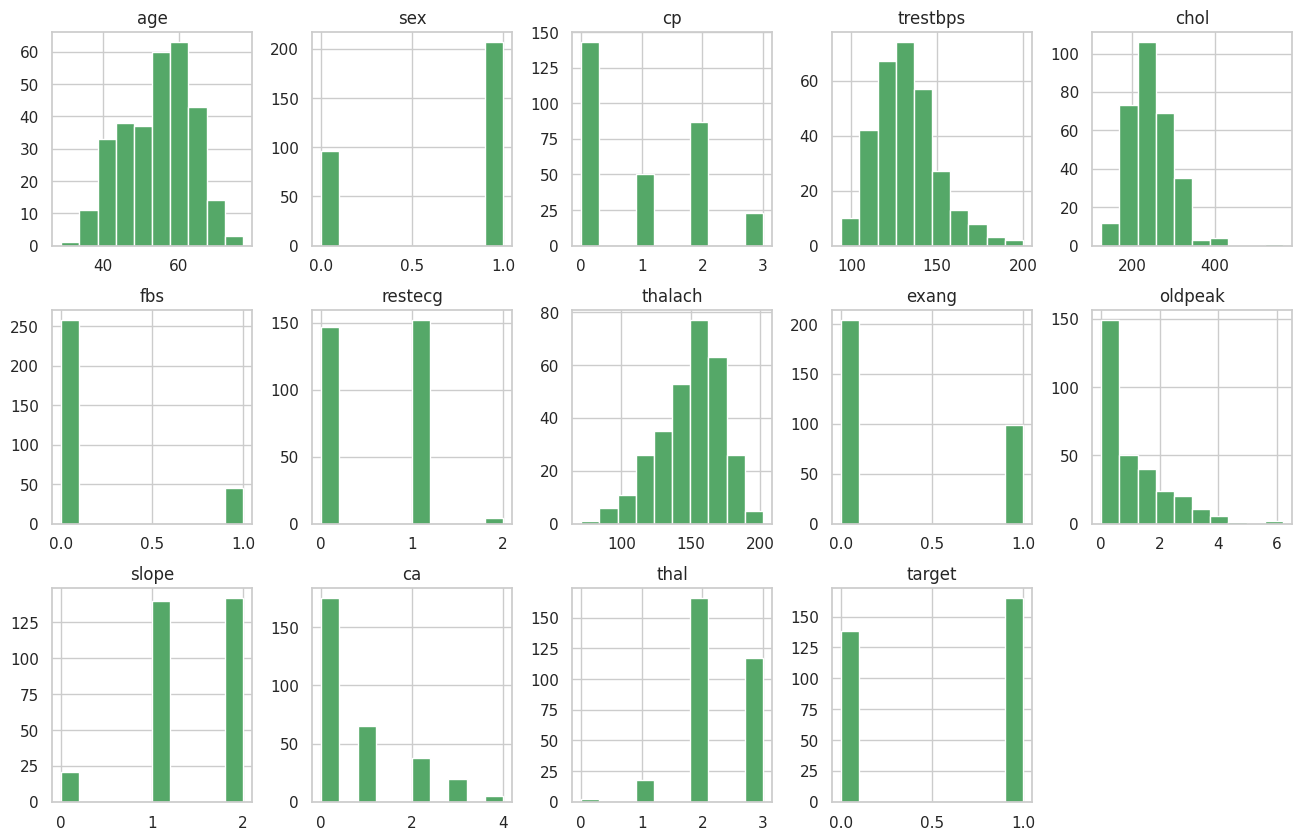

In [60]:
data.hist(layout = (3,5), figsize=(16,10), color = 'g')
print('Data Distribution')

In [61]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [64]:
data.duplicated().any()

np.False_

In [63]:
data.drop_duplicates(subset=None, inplace=True)
data.duplicated().any()
data.shape

(302, 14)

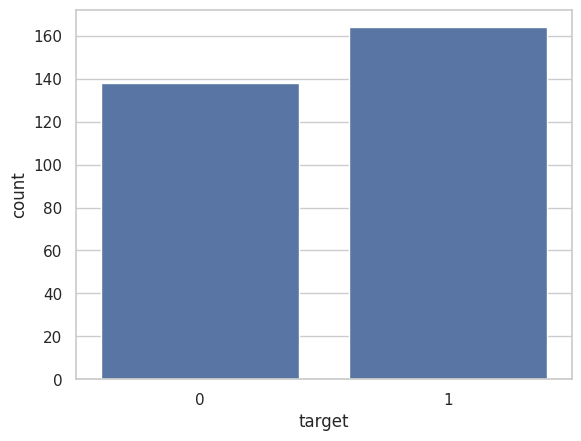

In [65]:
sns.countplot(x="target", data=data)
plt.show()

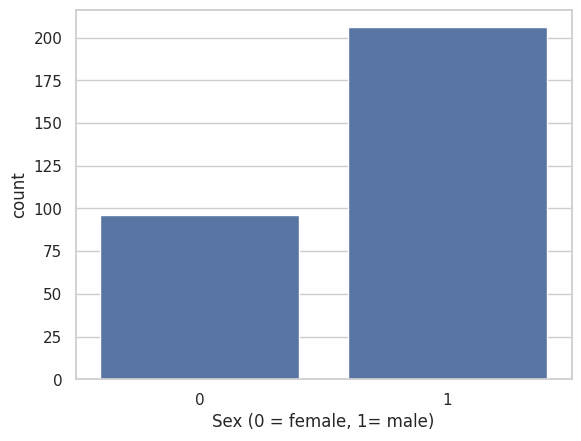

In [66]:
sns.countplot(x='sex', data=data)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

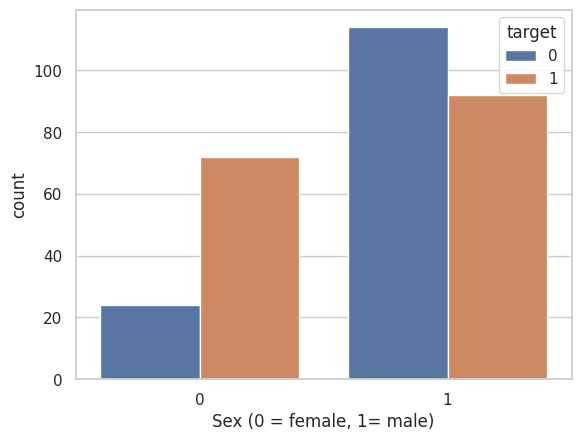

In [67]:
sns.countplot(x = data['sex'], hue = data['target'])
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

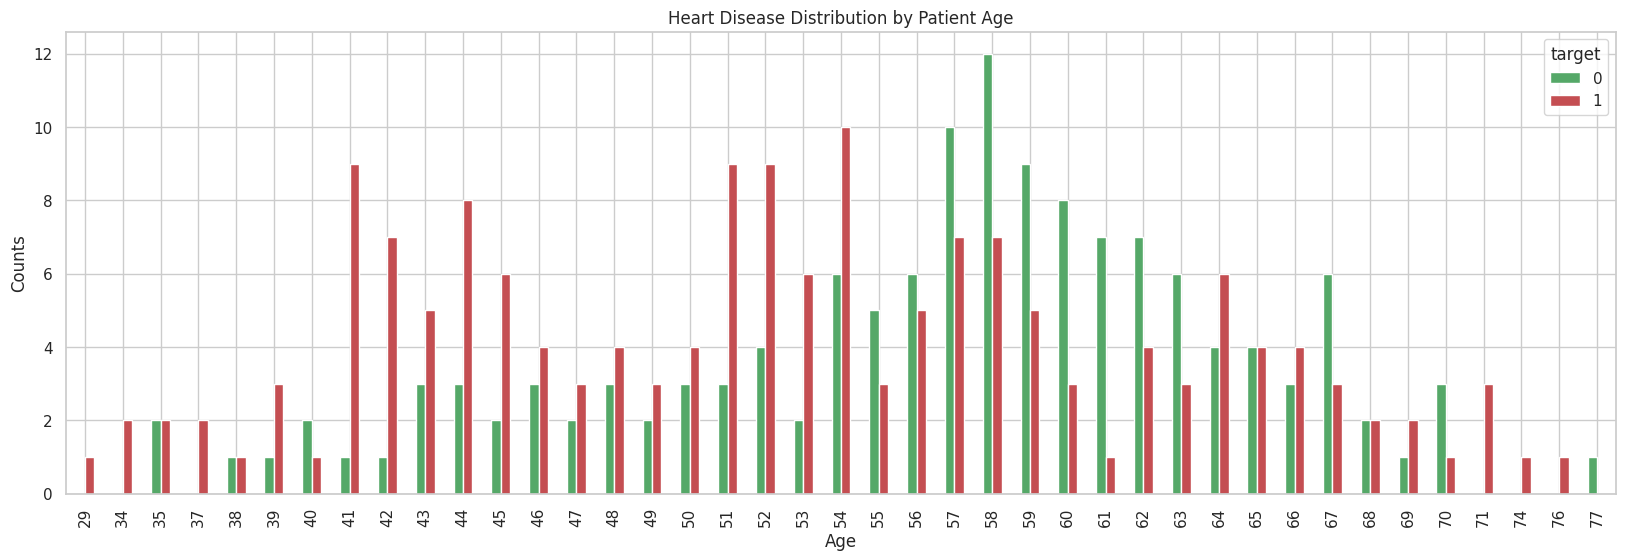

In [68]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6), color = ['g','r'])
plt.title('Heart Disease Distribution by Patient Age')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

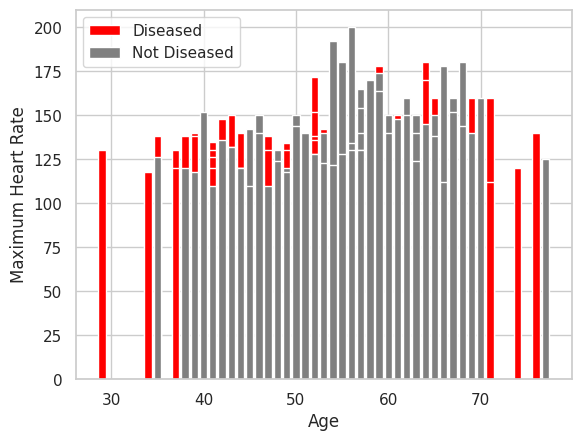

In [69]:
plt.bar(data.age[data.target==1], data.trestbps[(data.target==1)], color="red")
plt.bar(data.age[data.target==0], data.trestbps[(data.target==0)], color="grey")
plt.legend(["Diseased", "Not Diseased"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [70]:
def encode_features(df, features):
    for f in features:
        if(f in df.columns):
            encoded = pd.get_dummies(df[f])
            encoded = encoded.add_prefix(f + '_')
            df = pd.concat([df, encoded], axis=1)
        else:
            print('Feature not found')
            return df

    df.drop(columns=features, inplace = True)

    return df

In [71]:
features_to_encode = ['thal', 'slope', 'cp', 'restecg']
encoded = encode_features(data, features_to_encode)
data = encoded.copy()
print(data.shape)

(302, 24)


In [72]:
data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'target', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0',
       'slope_1', 'slope_2', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2'],
      dtype='object')

In [73]:
data.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,131.602649,246.500000,0.149007,149.569536,0.327815,1.043046,0.718543,0.543046
std,9.04797,0.466426,17.563394,51.753489,0.356686,22.903527,0.470196,1.161452,1.006748,0.498970
min,29.00000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,120.000000,211.000000,0.000000,133.250000,0.000000,0.000000,0.000000,0.000000
50%,55.50000,1.000000,130.000000,240.500000,0.000000,152.500000,0.000000,0.800000,0.000000,1.000000
75%,61.00000,1.000000,140.000000,274.750000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000
max,77.00000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,4.000000,1.000000


age         -0.221476
sex         -0.283609
trestbps    -0.146269
chol        -0.081437
fbs         -0.026826
thalach      0.419955
exang       -0.435601
oldpeak     -0.429146
ca          -0.408992
target       1.000000
thal_0      -0.007056
thal_1      -0.105986
thal_2       0.526030
thal_3      -0.484887
slope_0     -0.062822
slope_1     -0.360258
slope_2      0.392121
cp_0        -0.514626
cp_1         0.247649
cp_2         0.313696
cp_3         0.087959
restecg_0   -0.157299
restecg_1    0.172827
restecg_2   -0.068156
Name: target, dtype: float64


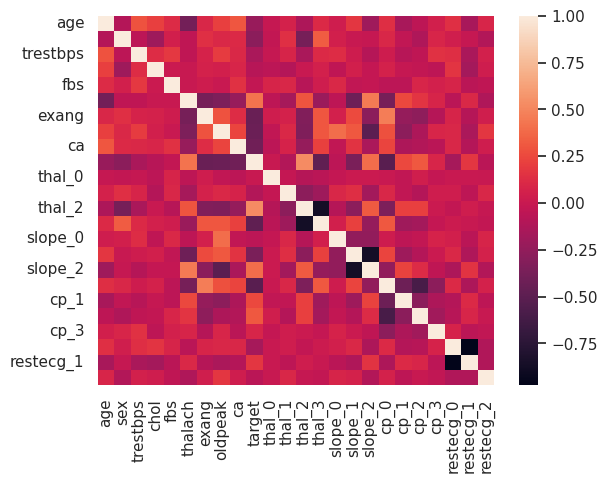

In [74]:
print(data.corr()['target'])
sns.heatmap(data.corr())
plt.show()

In [76]:
feature_engg_data = data.copy()
outlier_data = data.copy()
target_index = data.columns.get_loc("target") # Use this for separating the target labels from data
factor = 3
# Include this only for columns with suspected outliers
# Using a factor of 3, following Nelson's rule 1 to remove outliers - https://en.wikipedia.org/wiki/Nelson_rules
# Only for non-categorical fields
columns_to_include = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
for column in columns_to_include:
    upper_lim = feature_engg_data[column].mean () + feature_engg_data[column].std () * factor
    lower_lim = feature_engg_data[column].mean () - feature_engg_data[column].std () * factor
    feature_engg_data = feature_engg_data[(feature_engg_data[column] < upper_lim) & (feature_engg_data[column] > lower_lim)]

outlier_data = pd.concat([outlier_data, feature_engg_data]).drop_duplicates(keep=False)

In [77]:
print(feature_engg_data.shape)
print(outlier_data.shape)

(289, 24)
(13, 24)


In [78]:
from sklearn import preprocessing

def normalize_data(df):
    val = df.values
    min_max_normalizer = preprocessing.MinMaxScaler()
    norm_val = min_max_normalizer.fit_transform(val)
    df2 = pd.DataFrame(norm_val)

    return df2

norm_feature_engg_data = normalize_data(feature_engg_data)
norm_outlier_data = normalize_data(outlier_data)

In [79]:
from sklearn.model_selection import train_test_split

input_data = norm_feature_engg_data.drop([target_index],axis='columns')
targets =norm_feature_engg_data.filter([target_index],axis='columns')

x, x_test, y, y_test = train_test_split(input_data,targets,test_size=0.1,train_size=0.9, random_state=5)
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size = 0.22,train_size =0.78, random_state=5)

In [80]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
import math
import seaborn as sns

def evaluatation_metrics(y_true, y_pred,model):

    accuracy = accuracy_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)

    print("Accuracy of",model,": {:.2f}".format(accuracy))
    print("ROC AUC Score of", model,": {:.2f}".format(roc_auc))
    print("Confusion Matrix of", model,": \n")

    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    title = 'AUC-ROC Score: {:.2f}'.format(roc_auc)
    plt.title(title)
    plt.show()

In [81]:
import time

def ml_model(classifier, classifier_name, **kwargs):
    '''
    Generic method to train the selected classification algorithm on train, validation and test dataset.
    '''
    # Fit model
    if kwargs['x_train'] is not None:
        model = classifier.fit(kwargs['x_train'], kwargs['y_train'])
        y_pred_train= model.predict(kwargs['x_train'])
        print('*****************************************************')
        print('Training Set Performance:')
        print('*****************************************************')
        evaluatation_metrics(kwargs['y_train'], y_pred_train, classifier_name)

    if kwargs['x_valid'] is not None:
        y_pred_valid = model.predict(kwargs['x_valid'])
        print('*****************************************************')
        print('Validation Set Performance:')
        print('*****************************************************')
        evaluatation_metrics(kwargs['y_valid'], y_pred_valid, classifier_name)

    if kwargs['x_test'] is not None:
        start = time.time()
        y_pred_test= classifier.predict(kwargs['x_test'])
        end = time.time()
        print('*****************************************************')
        print('Test Set Performance:')
        print('*****************************************************')
        print('Model Time Complexity on Test Data: {:.3f} milli seconds'.format((end - start) * 1000))
        evaluatation_metrics(kwargs['y_test'], y_pred_test, classifier_name)

In [82]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curves(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, model_name):
    '''
    Method to generate learning curves for using training and cross validation scores
    '''
    plt.title(model_name)

    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

def plot_model_scalability_curves(train_sizes, training_time_mean, training_time_std, model_name):
    '''
    Method to generate scalability curve to see the model complexity
    '''
    plt.plot(train_sizes, training_time_mean, 'o-', color = 'purple')
    plt.fill_between(train_sizes, training_time_mean - training_time_std,
                         training_time_mean + training_time_std, alpha=0.1, color = 'purple')
    plt.xlabel("Training examples")
    plt.ylabel("Training time")
    plt.title("Scalability of "+ model_name)
    plt.show()

def plot_model_performance_curves(training_time_mean, test_scores_mean, test_scores_std, model_name):
    '''
    Method to generate performance curves to see if increase model complexity would improve score or not
    '''
    plt.plot(training_time_mean, test_scores_mean, 'o-')
    plt.fill_between(training_time_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    plt.xlabel("Training Time")
    plt.ylabel("Score")
    plt.title("Performance of "+ model_name)
    plt.show()


def generate_learning_curves(model, model_name, X, y, xlim = None, ylim=None,
                         epochs =None, figsize = (20,5)):
    '''
    Generic method to generate Learning Curves, Scalability curves and Performance curves
    Referred - https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
    '''
    cross_valid = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

    train_sizes=np.linspace(.1, 1.0, 5)
    train_sizes, train_scores, test_scores, training_time, _ = learning_curve(model, X, y, cv=cross_valid,
                                                                           n_jobs=epochs, train_sizes=train_sizes,
                                                                           return_times=True)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)

    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    training_time_mean = np.mean(training_time, axis=1)
    training_time_std = np.std(training_time, axis=1)

    # Plot learning curve
    plot_learning_curves(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, model_name)

    # Plot scalability curve
    plot_model_scalability_curves(train_sizes, training_time_mean, training_time_std, model_name)

    # Plot model performance score
    plot_model_performance_curves(training_time_mean, test_scores_mean, test_scores_std, model_name)

*****************************************************
Training Set Performance:
*****************************************************
Accuracy of Decision Tree : 1.00
ROC AUC Score of Decision Tree : 1.00
Confusion Matrix of Decision Tree : 



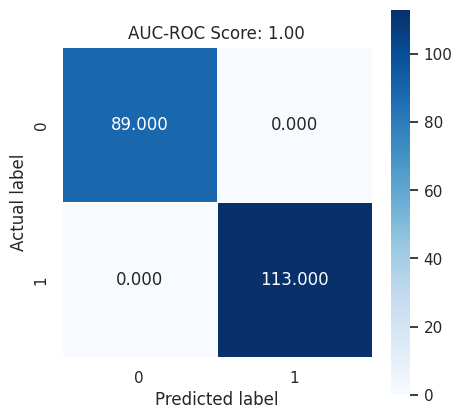

*****************************************************
Validation Set Performance:
*****************************************************
Accuracy of Decision Tree : 0.71
ROC AUC Score of Decision Tree : 0.71
Confusion Matrix of Decision Tree : 



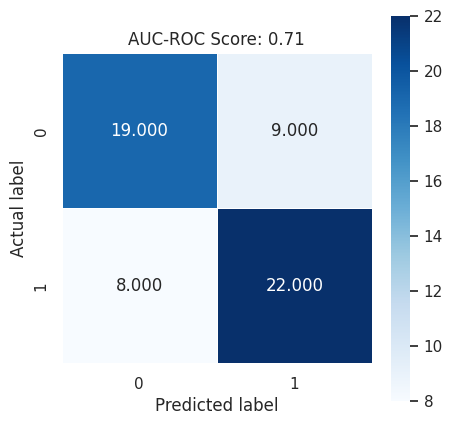

In [83]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

DTC = DecisionTreeClassifier(criterion='entropy', random_state=3) # Baseline model without any form of pruning
ml_model(DTC, 'Decision Tree', x_train = x_train, y_train = y_train, x_valid = x_valid, y_valid = y_valid, x_test = None)

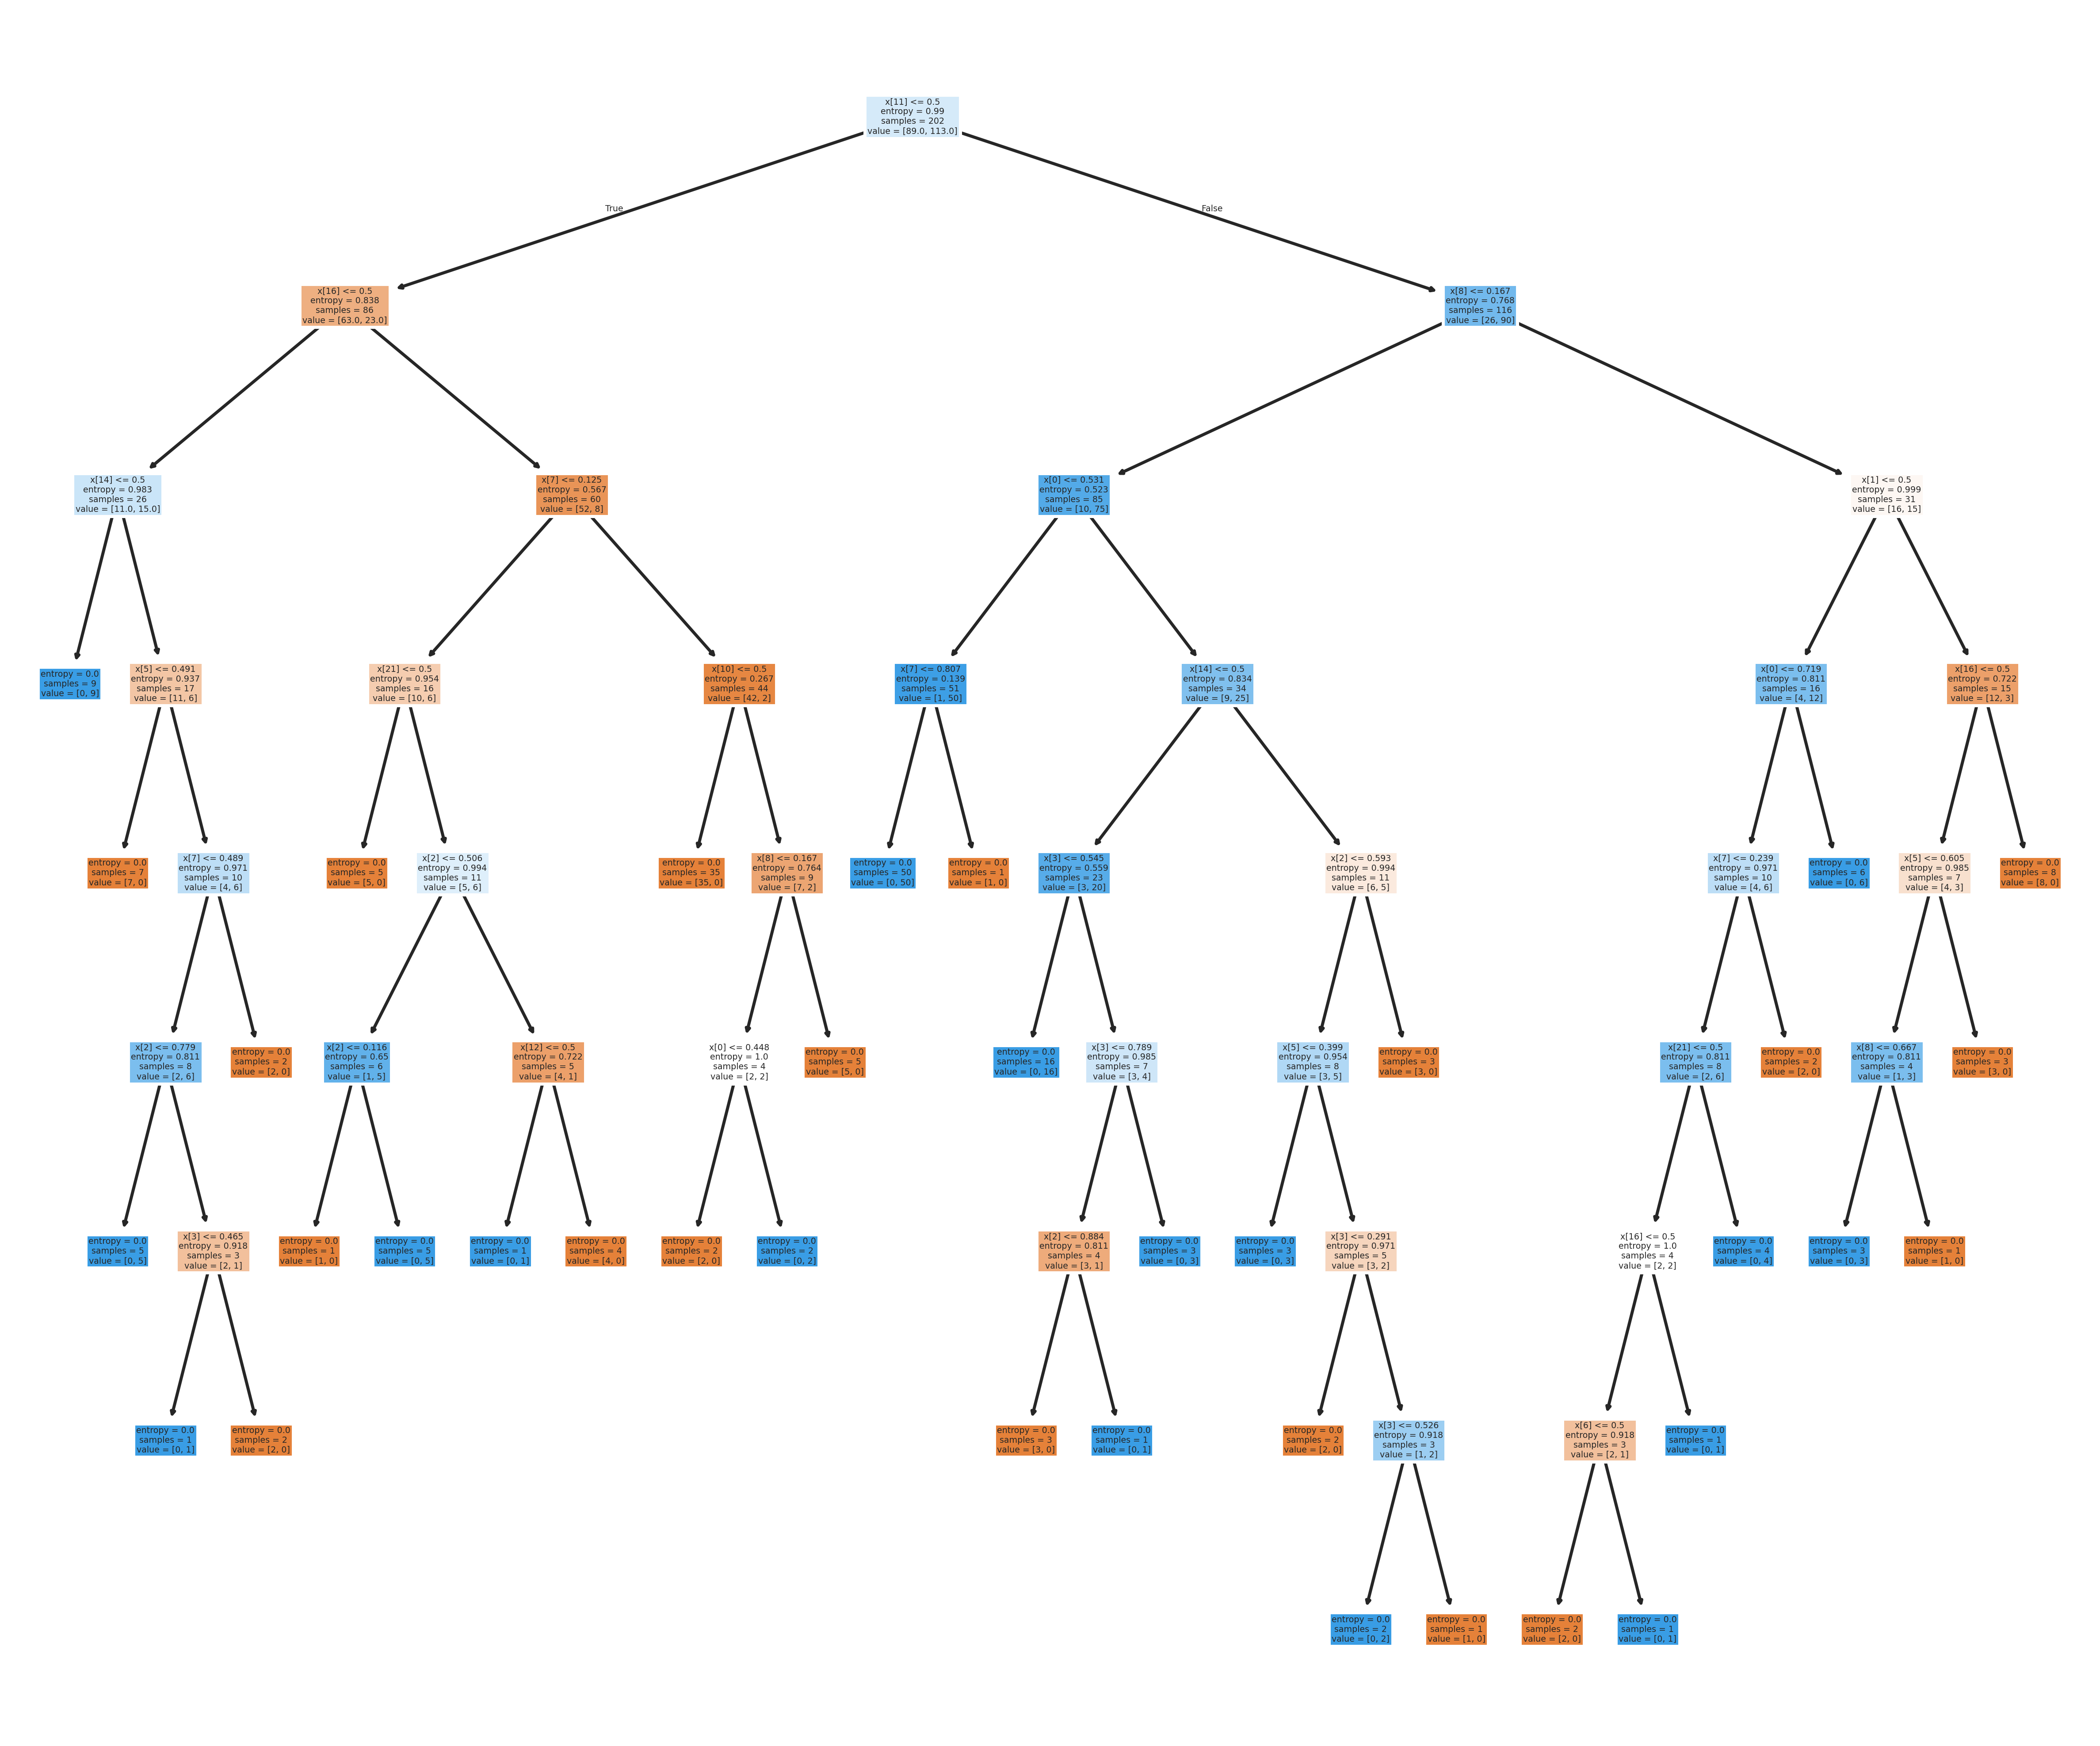

In [84]:
# Visualizing Decision Trees
fig, axes = plt.subplots(figsize = (12,10), dpi=500)
plot_tree(DTC,filled = True)
plt.show()

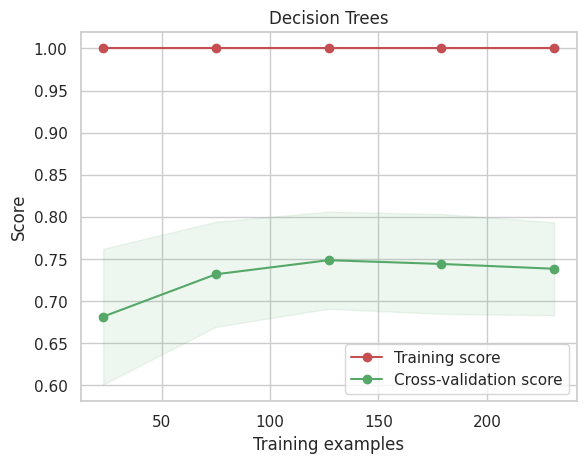

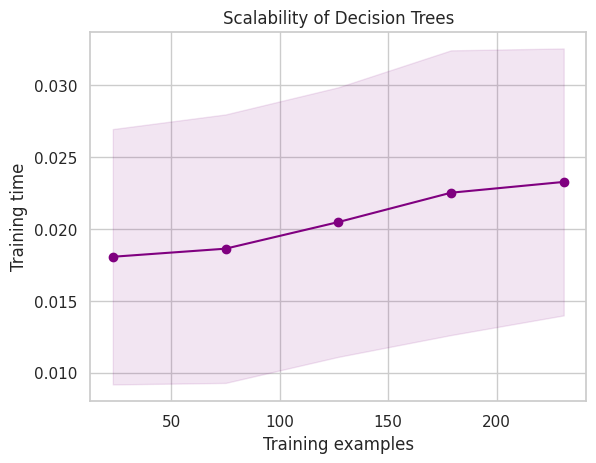

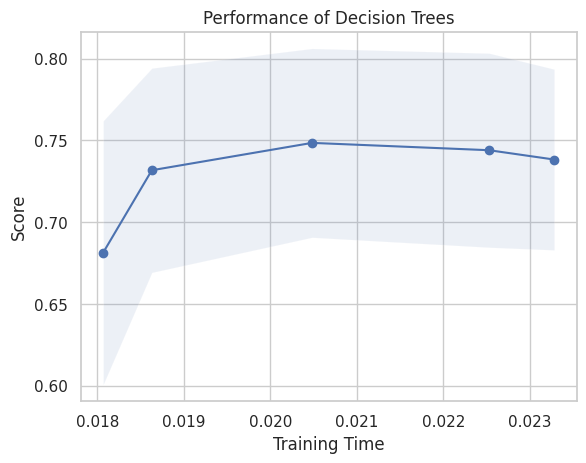

In [85]:
# Generation model curves on training and cross validation data
generate_learning_curves(
    model = DTC,
    model_name = "Decision Trees",
    X = input_data,
    y = targets,
    ylim=(0.7, 1.01),
    epochs=5)

In [90]:
# We will apply grid search to find the best possible set of hyper parameters
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

def DTGridSearch(X,y,param_lim):
    '''
    Decision Tree Grid Search to find the initial best guess of hyper-parameters
    '''
    param_grid = {
                    'min_samples_leaf':np.linspace(param_lim[0],param_lim[1],20).astype('int'),
                    'max_depth':np.arange(1,param_lim[2]),
                    'criterion' : ['entropy' , 'gini']
    }

    best_DT = GridSearchCV(estimator = DecisionTreeClassifier(random_state=3), param_grid=param_grid, cv=10)
    best_DT.fit(X, y)

    print("Best Decision Tree Hyper-Parameters are:")
    print(best_DT.best_params_)

    return best_DT.best_params_['min_samples_leaf'], best_DT.best_params_['max_depth'], best_DT.best_params_['criterion']

In [91]:
min_samples_leaf_lim = int(0.005 * len(x_train)) # 0.5% of length of training size
max_samples_leaf_lim = int(0.1 * len(x_train)) # 10% of length of training size
max_depth = 10

best_min_sample_leaf, best_max_depth, best_criterion = DTGridSearch( x_train,
                                                                     y_train,
                                                                     (min_samples_leaf_lim, max_samples_leaf_lim, max_depth)
                                                                   )

Best Decision Tree Hyper-Parameters are:
{'criterion': 'gini', 'max_depth': np.int64(3), 'min_samples_leaf': np.int64(12)}


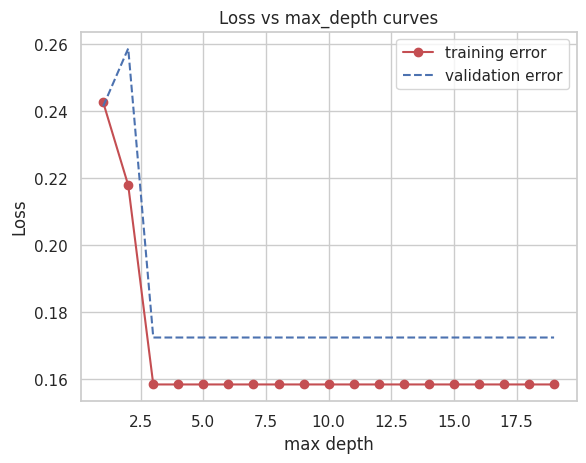

In [92]:
train=[]
valid=[]
for i in range(1,20):
    dec = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 12, random_state=3, max_depth=i)
    dec.fit(x_train, y_train)
    train.append(1- accuracy_score(dec.predict(x_train), y_train))
    valid.append(1- accuracy_score(dec.predict(x_valid), y_valid))

plt.title('Loss vs max_depth curves')
depth=[i for i in range(1,20)]
plt.plot(depth,train,'o-', color = 'r', label = 'training error')
plt.plot(depth,valid, '--', color = 'b', label = 'validation error')
plt.xlabel('max depth')
plt.ylabel('Loss')
plt.legend()

*****************************************************
Training Set Performance:
*****************************************************
Accuracy of Decision Tree : 0.84
ROC AUC Score of Decision Tree : 0.84
Confusion Matrix of Decision Tree : 



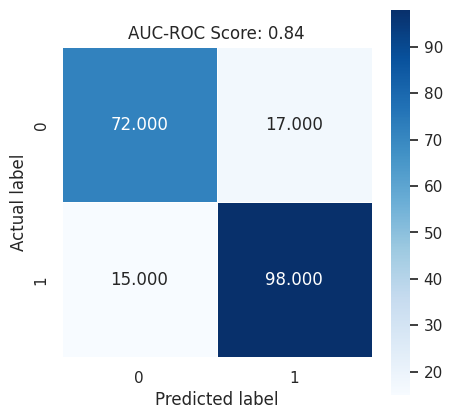

*****************************************************
Validation Set Performance:
*****************************************************
Accuracy of Decision Tree : 0.83
ROC AUC Score of Decision Tree : 0.83
Confusion Matrix of Decision Tree : 



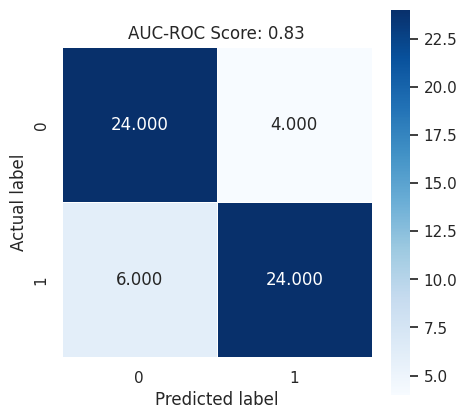

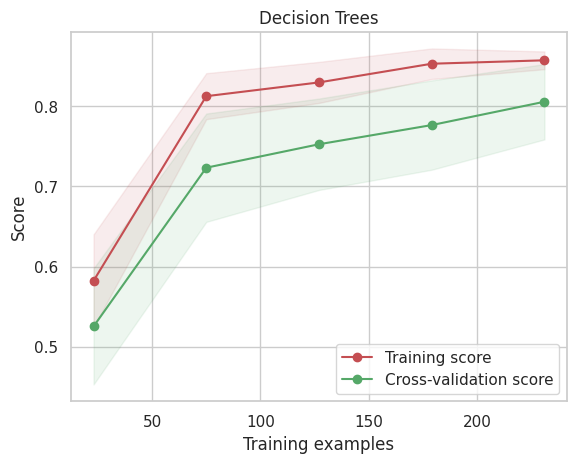

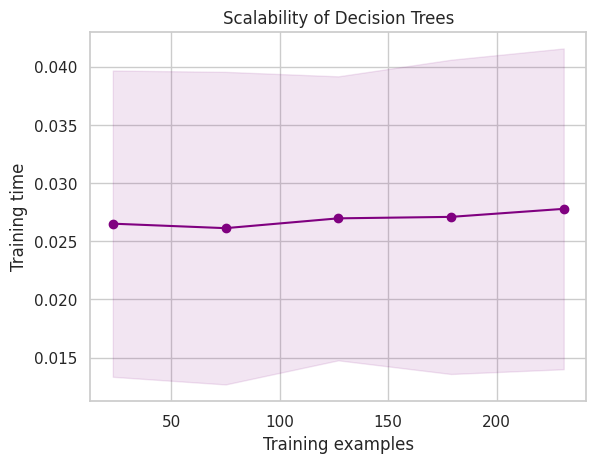

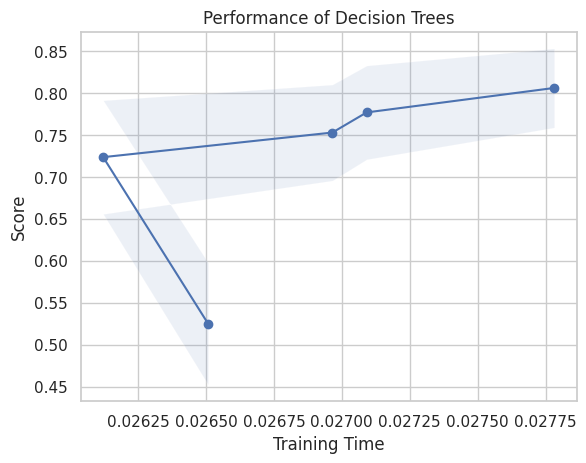

In [93]:
tuned_DTC = DecisionTreeClassifier(criterion='gini', max_depth = 3, min_samples_leaf = 12, random_state=3)
ml_model(tuned_DTC, 'Decision Tree', x_train = x_train, y_train = y_train, x_valid = x_valid, y_valid = y_valid, x_test = None)

generate_learning_curves(
    model = tuned_DTC,
    model_name = "Decision Trees",
    X = input_data,
    y = targets,
    ylim=(0.7, 1.01),
    epochs=5)

For the tuned Decision Tree model :

*****************************************************
Test Set Performance:
*****************************************************
Model Time Complexity on Test Data: 3.574 milli seconds
Accuracy of tuned Decision Tree : 0.79
ROC AUC Score of tuned Decision Tree : 0.81
Confusion Matrix of tuned Decision Tree : 



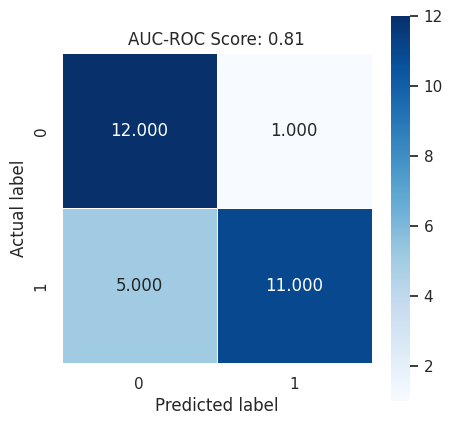

In [94]:
print('For the tuned Decision Tree model :\n')
ml_model(tuned_DTC, 'tuned Decision Tree', x_train = None, x_valid = None, x_test = x_test, y_test = y_test.values.ravel() )

*****************************************************
Test Set Performance:
*****************************************************
Model Time Complexity on Test Data: 1.737 milli seconds
Accuracy of tuned Decision Tree : 0.79
ROC AUC Score of tuned Decision Tree : 0.81
Confusion Matrix of tuned Decision Tree : 



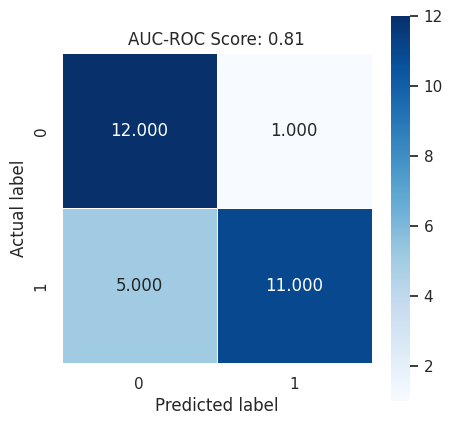

In [95]:
ml_model(
    tuned_DTC,                  # The trained Decision Tree model (first argument)
    'tuned Decision Tree',      # The name of the model (second argument)
    x_train=None,               # Training data (set to None in this case)
    x_valid=None,               # Validation data (set to None in this case)
    x_test=x_test,              # Test data (passed as 'x_test')
    y_test=y_test.values.ravel()  # Test labels (flattened using `ravel`)
)
